# HT3 Modelos de regresion lineal

Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869

Hay 4 archivos con data que son: 

- data_description.txt: descripcion de cada columna proporcinado por el conjunto de datos a trabajar

- train.csv: el conjunto de training

- test.csv: el conjunto de test
 
- sample_submission.csv: presentacion de un punto de referencia a partir de una regresion lineal sobre el año y mes de venta.


# Análisis exploratorio

In [12]:
#librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
#cargar los datos
df_train = pd.read_csv("train.csv")


In [14]:
#exploracion de datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df_train.columns))

#resumen del set de datos
print("\n--Resumen del set de datos:--")
print(df_train.describe())



--Columnas:---
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

In [15]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
print(df_train.dtypes)

tipos_de_datos = df_train.dtypes.value_counts()

print('resumen:')
print(tipos_de_datos)




----Tipo de datos:---
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
resumen:
object     43
int64      35
float64     3
Name: count, dtype: int64


## Variables

esta descripcion es tomada de https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale
- id: id de sale

Tipo de variables:
Variables cualitativas:
Ordinales:
- OverallQual
- OverallCond
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence


Norminales:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- CentralAir
- Electrical
- Functional
- GarageType
- PavedDrive
- MiscFeature
- SaleType
- SaleCondition

Variables cuantitativas:
Continuas:
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- SalePrice

discretras:
- MSSubClass
- YearBuilt
- YearRemodAdd
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- Bedroom
- Kitchen
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageYrBlt
- MoSold
- YrSold

In [16]:
# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df_train.isnull()
print(nulos)

nulos_por_columna = df_train.isnull().sum()
print(list(nulos_por_columna))


- - - - - - - VALORES NULLS - - - - - - -
         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence 

In [17]:
# Elimina filas con al menos un valor nulo

# Hallazgos de los conjuntos de datos

# Dividir el set de datos a usar


In [18]:
df_train.describe()  # Estadísticas básicas de las variables numéricas
df_train.describe(include="O")  # Estadísticas de las variables categóricas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


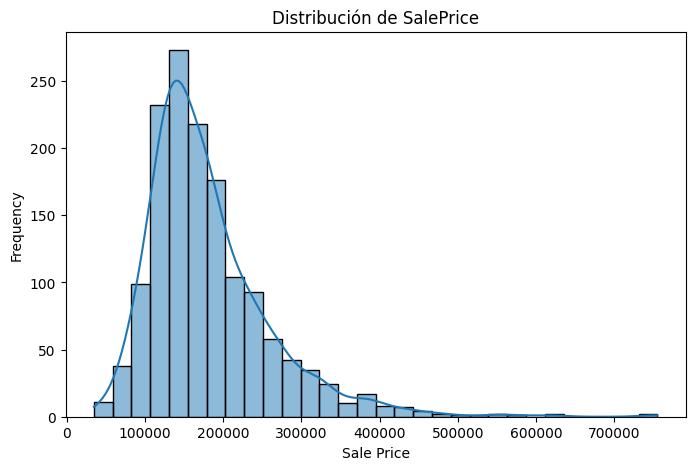

In [19]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df_train["SalePrice"], kde=True, bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribución de SalePrice")
plt.show()

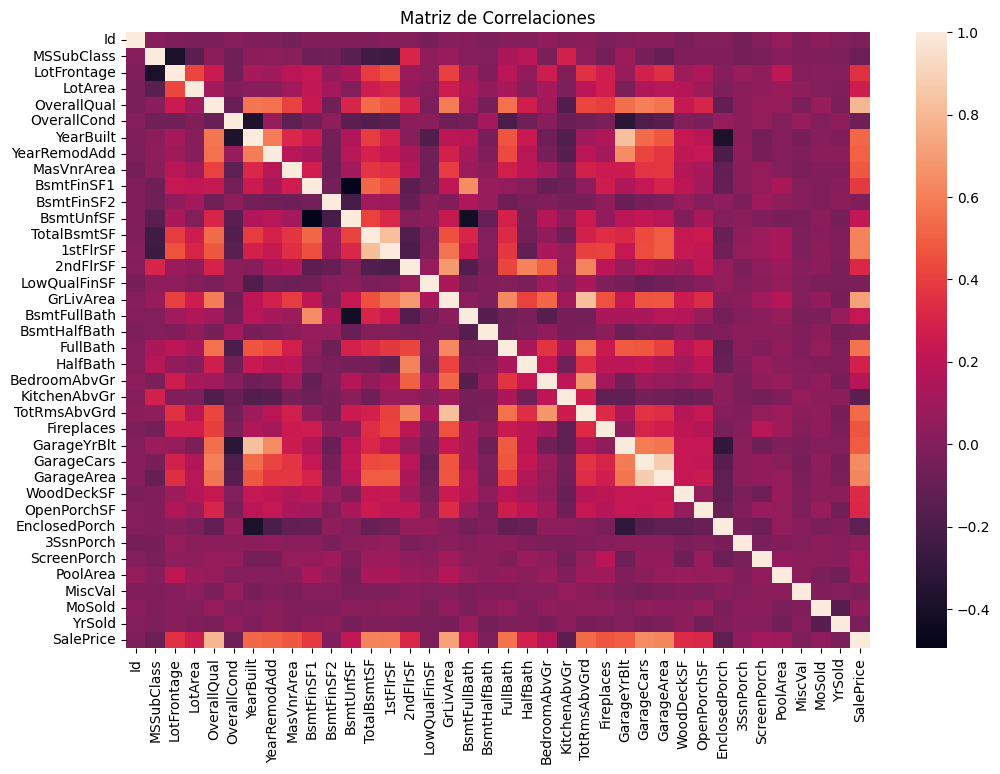

In [21]:
correlation_matrix = df_train.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

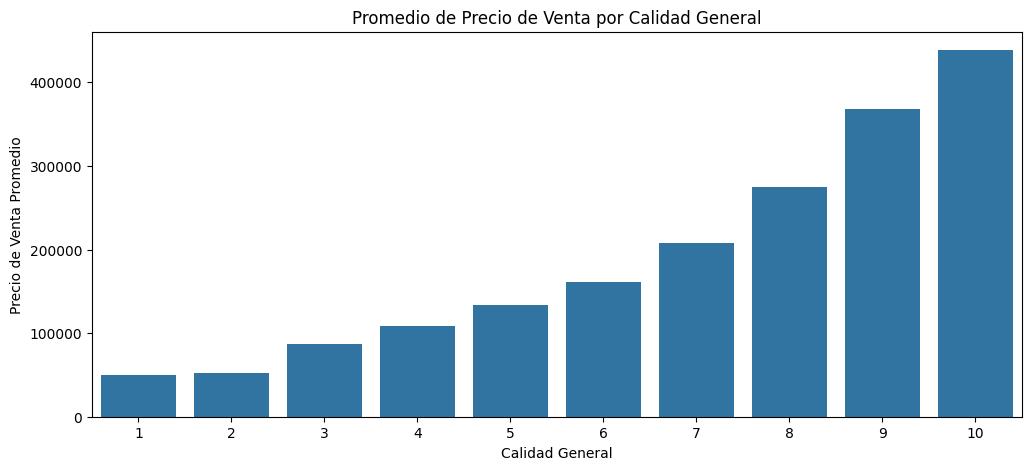

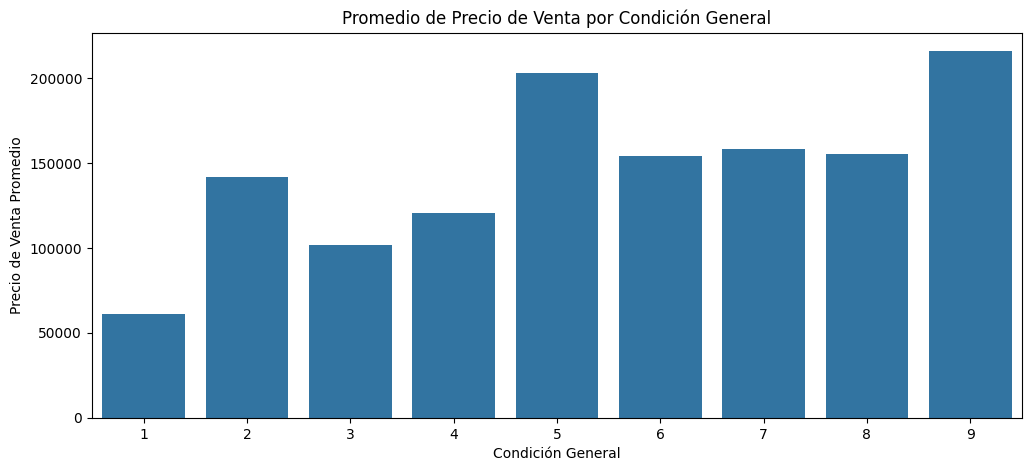

(OverallQual
 1      50150.000000
 2      51770.333333
 3      87473.750000
 4     108420.655172
 5     133523.347607
 6     161603.034759
 7     207716.423197
 8     274735.535714
 9     367513.023256
 10    438588.388889
 Name: SalePrice, dtype: float64,
 OverallCond
 1     61000.000000
 2    141986.400000
 3    101929.400000
 4    120438.438596
 5    203146.914738
 6    153961.591270
 7    158145.487805
 8    155651.736111
 9    216004.545455
 Name: SalePrice, dtype: float64)

In [22]:
quality_groups = df_train.groupby('OverallQual')['SalePrice'].mean()

condition_groups = df_train.groupby('OverallCond')['SalePrice'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=quality_groups.index, y=quality_groups.values)
plt.title("Promedio de Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=condition_groups.index, y=condition_groups.values)
plt.title("Promedio de Precio de Venta por Condición General")
plt.xlabel("Condición General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

quality_groups, condition_groups